<a href="https://colab.research.google.com/github/pugalCse01/Data-Cleaning-Preprocessing/blob/main/Data_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary Libraries
import pandas as pd
import numpy as np


In [2]:
#Read the Dataset using pansad
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
#identify the  number of missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df[['Age','Cabin']]

,Age,Cabin
0,22.0,NaN
1,38.0,C85
2,26.0,NaN
3,35.0,C123
4,35.0,NaN
...,...,...
886,27.0,NaN
887,19.0,B42
888,NaN,NaN
889,26.0,C148


In [9]:
# filling the Age  missing values
#Replace the missing values with mean of age
df['Age'] = df['Age'].fillna(df['Age'].mean()).inplace = True

In [10]:
# filling the   missing values
#Replace the missing values with mod of age
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()).inplace = True

In [11]:
#Drop the Embarked missing value .no need to treat that value because it does not affect the dataset
df.dropna(inplace = True)

In [12]:
#After handle the missing values check isnull is there or not
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
#Convert categorical into  numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Age'] = le.fit_transform(df['Age'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,0,1,0,522,7.2500,0,2
1,2,1,1,190,0,0,1,0,595,71.2833,0,0
2,3,1,3,353,0,0,0,0,668,7.9250,0,2
3,4,1,1,272,0,0,1,0,48,53.1000,0,2
4,5,0,3,15,1,0,0,0,471,8.0500,0,2


In [16]:
#Normalize the data using StandardScaler
#in this dataset this two have high values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Fare'] = sc.fit_transform(df[['Fare']])
df['Ticket'] = sc.fit_transform(df[['Ticket']])

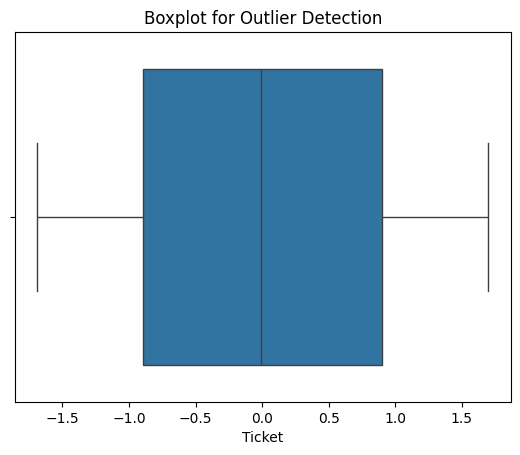

In [17]:
#identify the outliers using boxplot
#in this Ticket no outliers so we leave this feature as it is
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Ticket'])
plt.title('Boxplot for Outlier Detection')
plt.show()


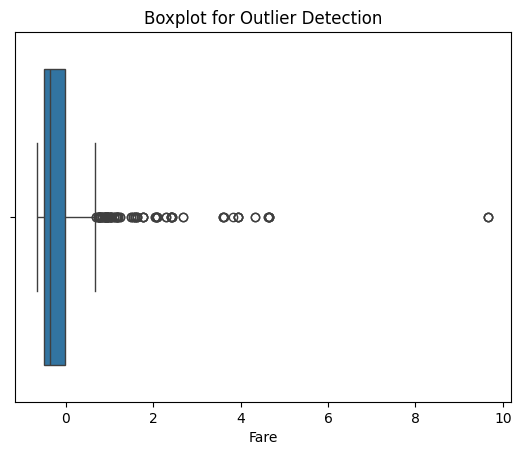

In [18]:
#in this Fare we detected the outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Fare'])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [19]:
#we treated the outliers with z-score
from scipy.stats import zscore
z = np.abs(zscore(df['Fare']))
threshold = 3
df_clean = df[z < threshold]



In [21]:
#After treated the outlier we check whether the outlier treated or not
#outliers are removed row decreased from 891 to 869
df_clean.shape

(869, 12)